In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/obesity-prediction-dataset/ObesityDataSet_raw_and_data_sinthetic.csv




---

## 🧑🏻‍💻 About the Author  
**Name:** Arif Miah  

🎓 **Profession:** Machine Learning Engineer & Data Scientist  

---

### 🔭 **Career Objective**  
🚀 My goal is to contribute to groundbreaking advancements in artificial intelligence and data science, empowering companies and individuals with data-driven solutions. I strive to simplify complex challenges, craft innovative projects, and pave the way for a smarter and more connected future.  

🔍 As a **Machine Learning Engineer** and **Data Scientist**, I am passionate about using machine learning, deep learning, computer vision, and advanced analytics to solve real-world problems. My expertise lies in delivering impactful solutions by leveraging cutting-edge technologies.  

---

### 💻 **Skills**  
- 🤖 **Artificial Intelligence & Machine Learning**  
- 👁️‍🗨️ **Computer Vision & Predictive Analytics**  
- 🧠 **Deep Learning & Natural Language Processing (NLP)**  
- 🐍 **Python Programming & Automation**  
- 📊 **Data Visualization & Analysis**  
- 🚀 **End-to-End Model Development & Deployment**  

---

### 🚧 **Featured Projects**  

📊 **Lung Cancer Prediction with Deep Learning**  
Achieved 99% accuracy in a computer vision project using 12,000 medical images across three classes. This project involved data preprocessing, visualization, and model training to detect cancer effectively.  

🌾 **Ghana Crop Disease Detection Challenge**  
Developed a model using annotated images to identify crop diseases with bounding boxes, addressing real-world agricultural challenges and disease mitigation.  

🛡️ **Global Plastic Waste Analysis**  
Utilized GeoPandas, Matplotlib, and machine learning models like RandomForestClassifier and CatBoostClassifier to analyze trends in plastic waste management.  

🎵 **Twitter Emotion Classification**  
Performed exploratory data analysis and built a hybrid machine learning model to classify Twitter sentiments, leveraging text data preprocessing and visualization techniques.  

---

### ⚙️ **Technical Skills**  

- 💻 **Programming Languages:** Python 🐍, SQL 🗃️, R 📈  
- 📊 **Data Visualization Tools:** Matplotlib 📉, Seaborn 🌊, Tableau 📊, Power BI 📊  
- 🧠 **Machine Learning & Deep Learning:** Scikit-learn 🤖, TensorFlow 🔥, PyTorch 🧩  
- 🗂️ **Big Data Technologies:** Hadoop 🏗️, Spark ⚡  
- 🚀 **Model Deployment:** Flask 🌐, FastAPI ⚡, Docker 🐳  

---

### 🌐 **Connect with Me**  

📧 **Email:** arifmiahcse@gmail.com 

🔗 **LinkedIn:** [www.linkedin.com/in/arif-miah-8751bb217](#)  

🐱 **GitHub:** [https://github.com/Arif-miad](#)  

 



<div style="text-align: center; color: #4CAF50; margin: 20px; padding: 15px; font-size: 24px; font-weight: bold;">
    Import Necessary Libraries
</div>


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Display settings
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier



<div style="text-align: center; color: #4CAF50; margin: 20px; padding: 15px; font-size: 24px; font-weight: bold;">
    Load the dataset
</div>

In [2]:
df = pd.read_csv("/kaggle/input/obesity-prediction-dataset/ObesityDataSet_raw_and_data_sinthetic.csv")

In [3]:
df.head()

Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  NCP  \
0  Female   21    1.62    64.0                            yes   no   2.0  3.0   
1  Female   21    1.52    56.0                            yes   no   3.0  3.0   
2    Male   23    1.80    77.0                            yes   no   2.0  3.0   
3    Male   27    1.80    87.0                             no   no   3.0  3.0   
4    Male   22    1.78    89.8                             no   no   2.0  1.0   

        CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
0  Sometimes    no   2.0   no  0.0  1.0          no  Public_Transportation   
1  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes  Public_Transportation   
2  Sometimes    no   2.0   no  2.0  1.0  Frequently  Public_Transportation   
3  Sometimes    no   2.0   no  2.0  0.0  Frequently                Walking   
4  Sometimes    no   2.0   no  0.0  0.0   Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_Weight  
3   Overweight_Level_I  
4  Overweight_Level_II

<div style="text-align: center; color: #4CAF50; margin: 20px; padding: 15px; font-size: 24px; font-weight: bold;">
    Exploratory data analysis
</div>

In [4]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [5]:
df.duplicated().sum()

24

In [6]:
df.shape

(2111, 17)

In [7]:
df.count()

Gender                            2111
Age                               2111
Height                            2111
Weight                            2111
family_history_with_overweight    2111
FAVC                              2111
FCVC                              2111
NCP                               2111
CAEC                              2111
SMOKE                             2111
CH2O                              2111
SCC                               2111
FAF                               2111
TUE                               2111
CALC                              2111
MTRANS                            2111
NObeyesdad                        2111
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [9]:
df.describe()

Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.315964     1.701620    86.586035     2.418986     2.685651   
std       6.357078     0.093368    26.191163     0.533996     0.778079   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      20.000000     1.630000    65.470000     2.000000     2.660000   
50%      23.000000     1.700000    83.000000     2.390000     3.000000   
75%      26.000000     1.770000   107.430000     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008053     1.010313     0.657861  
std       0.612950     0.850613     0.608926  
min       1.000000     0.000000     0.000000  
25%       1.585000     0.125000     0.000000  
50%       2.000000     1.000000     0.625000  
75%       2.480000     1.670000     1.000000  
max       3.000000     3.000000     2.000000

<div style="text-align: center; color: #4CAF50; margin: 20px; padding: 15px; font-size: 24px; font-weight: bold;">
  dataset analysis and visualization
</div>

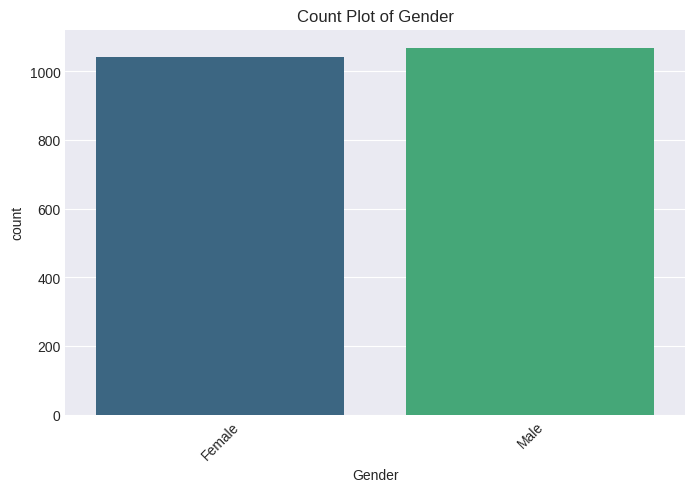

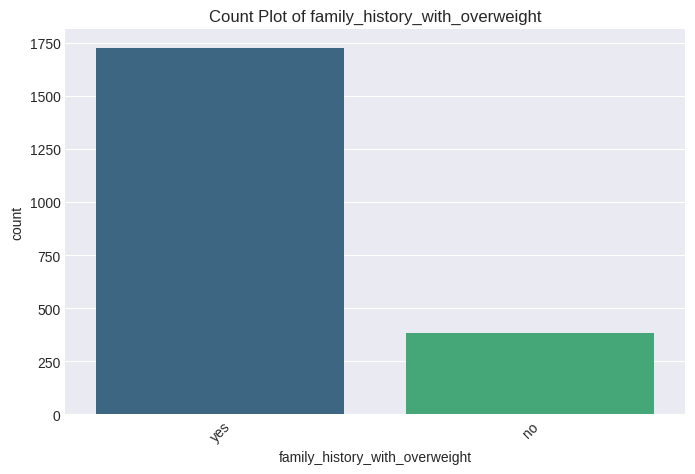

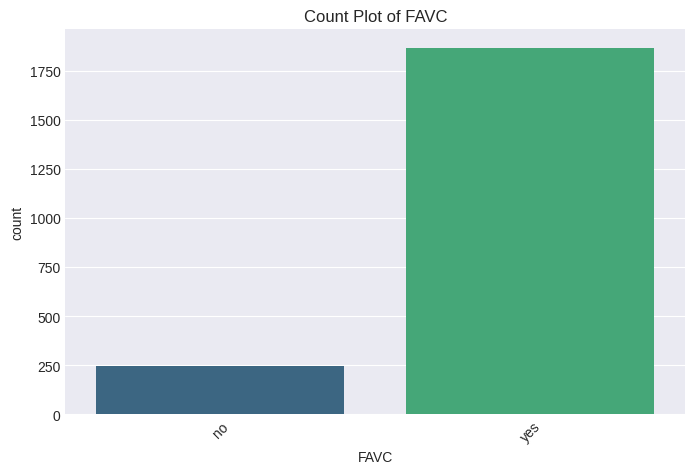

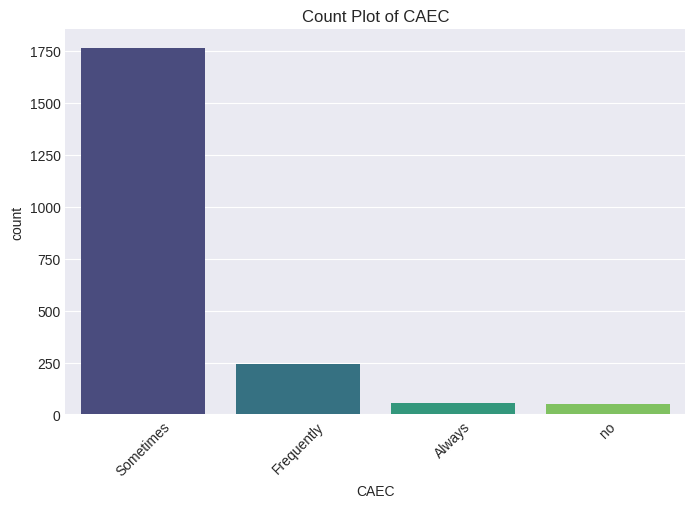

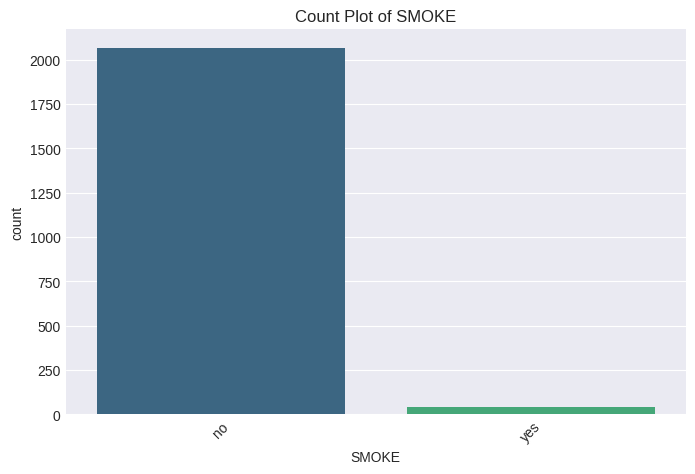

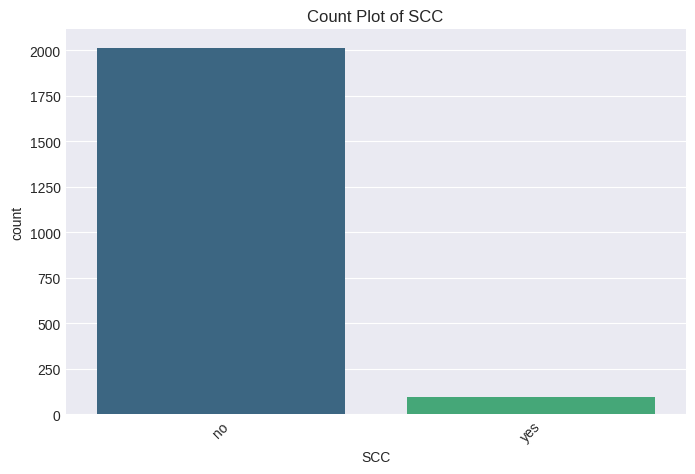

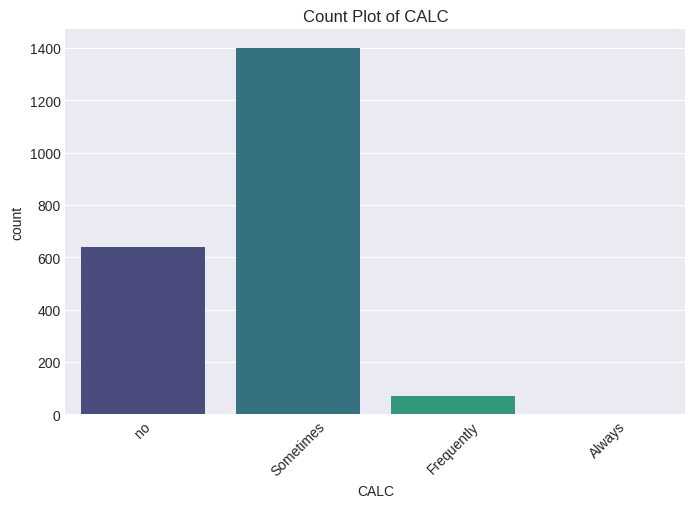

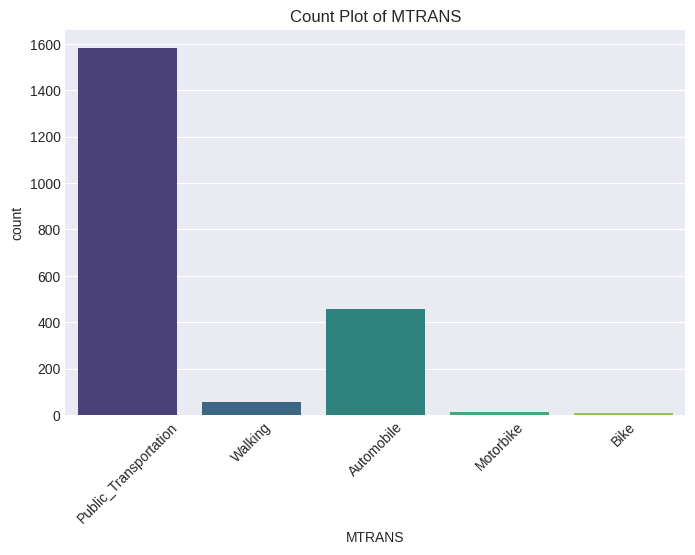

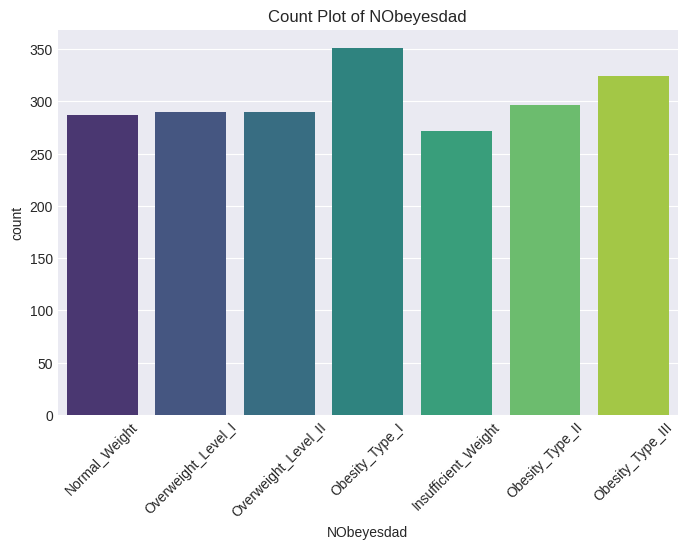

In [13]:
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 
                    'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()


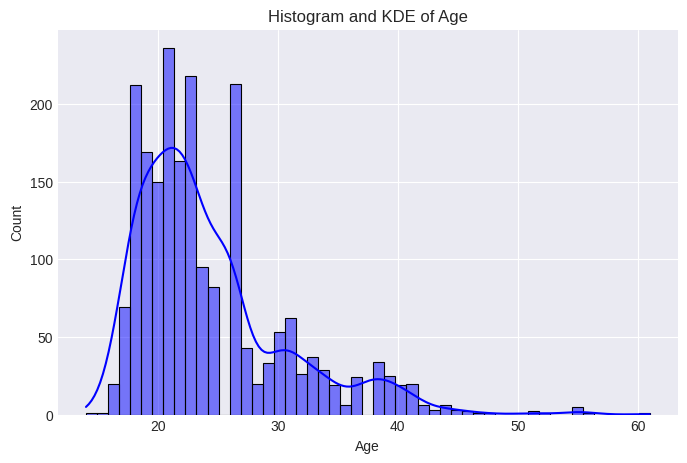

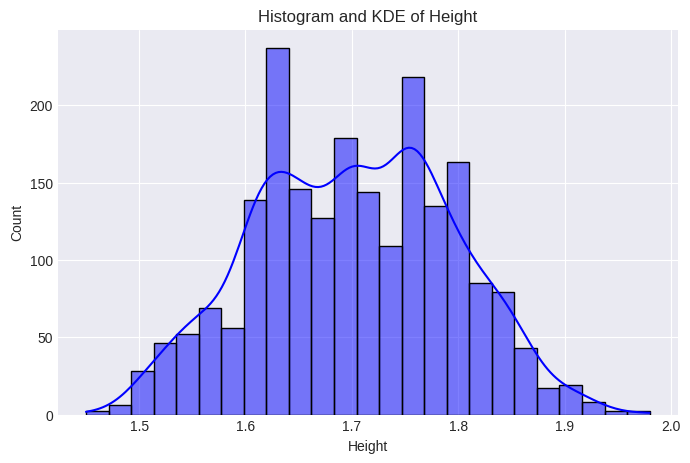

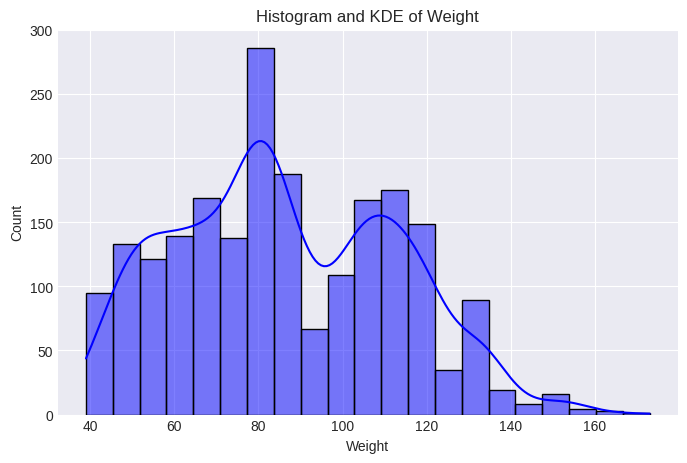

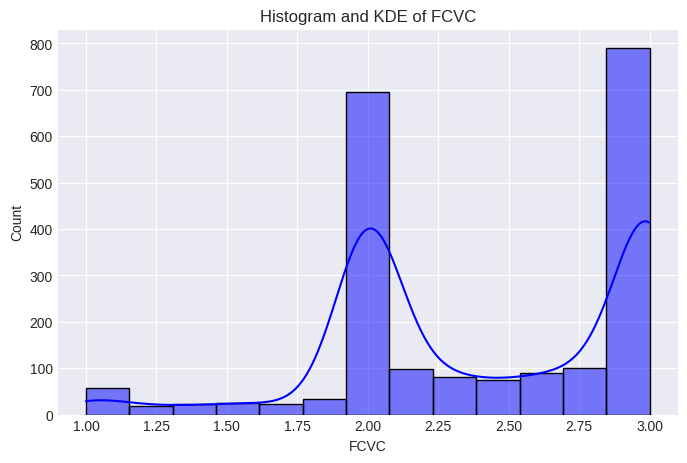

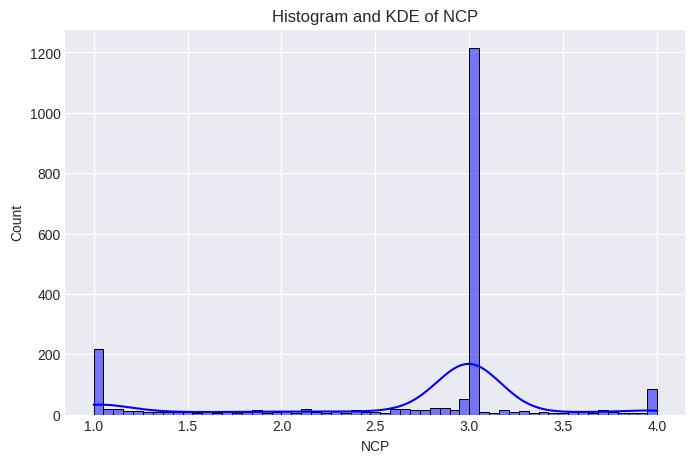

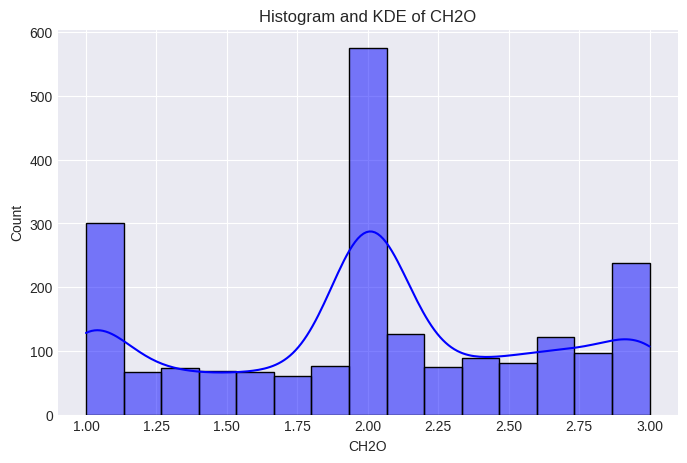

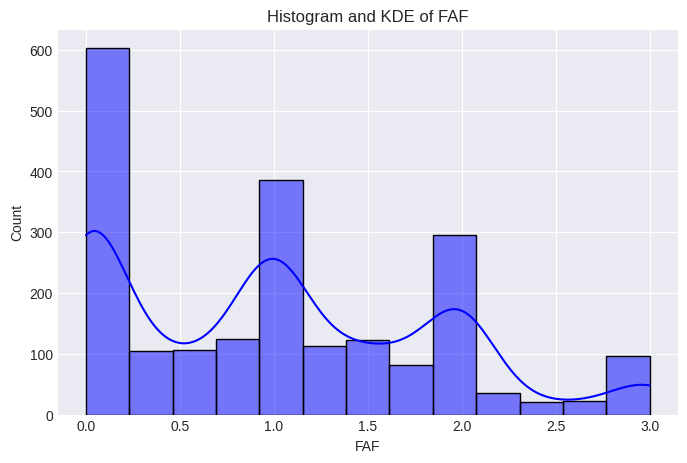

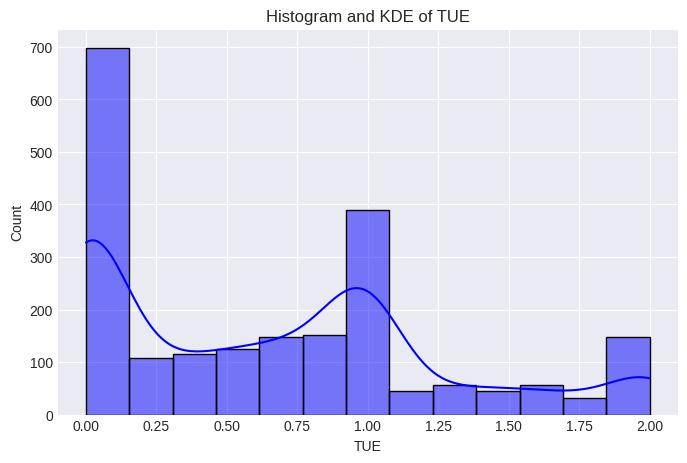

In [14]:
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, kde=True, color='blue')
    plt.title(f'Histogram and KDE of {col}')
    plt.show()


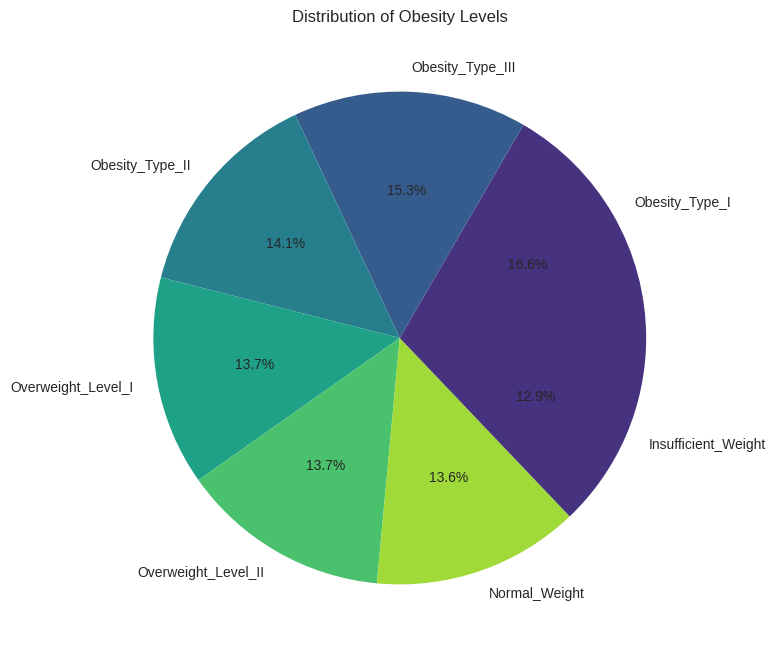

In [15]:
plt.figure(figsize=(8, 8))
df['NObeyesdad'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Distribution of Obesity Levels')
plt.ylabel('')
plt.show()


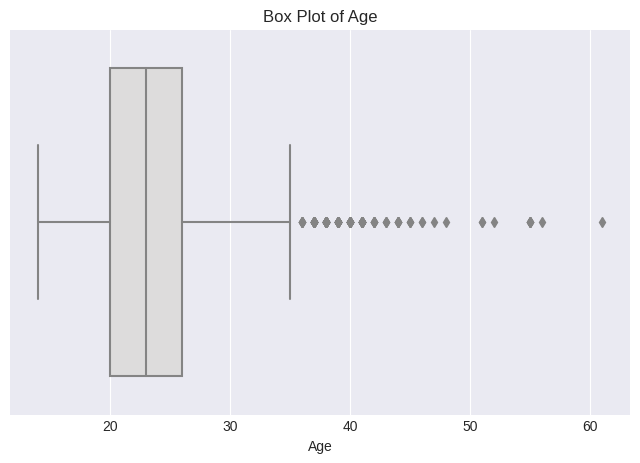

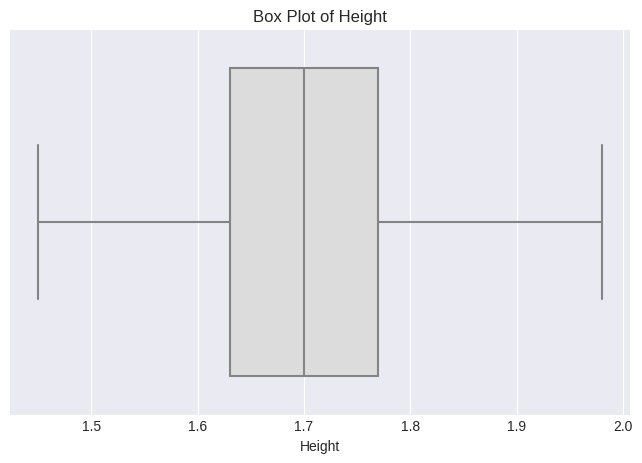

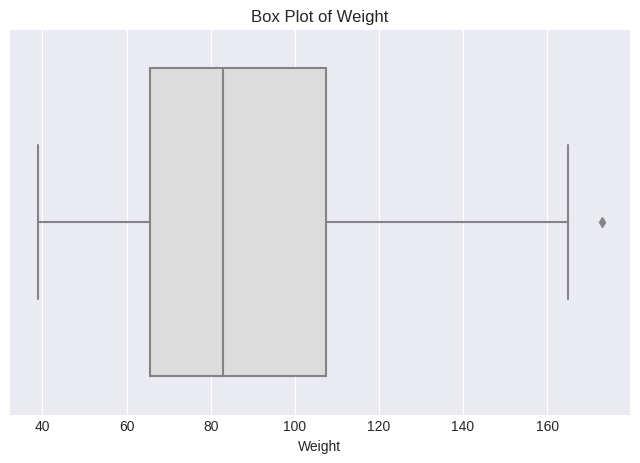

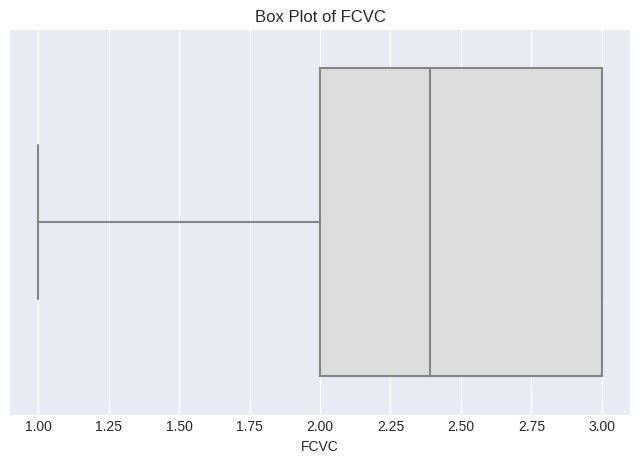

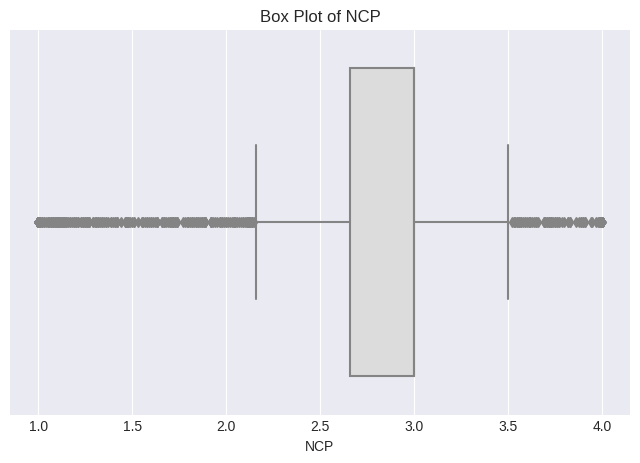

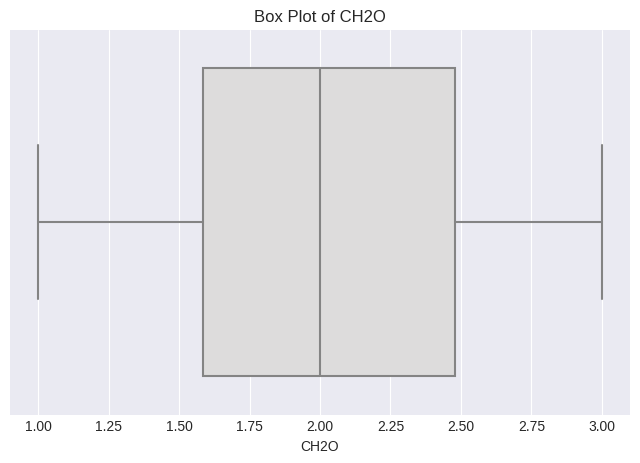

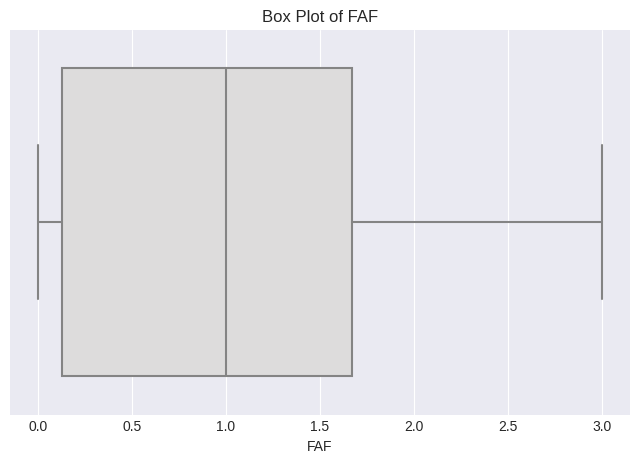

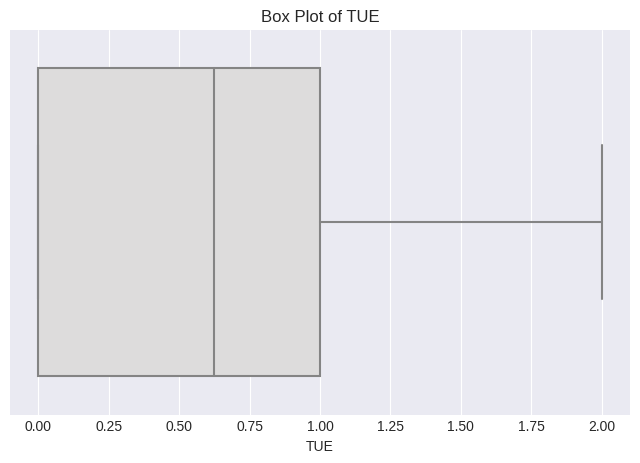

In [16]:
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=col, palette='coolwarm')
    plt.title(f'Box Plot of {col}')
    plt.show()


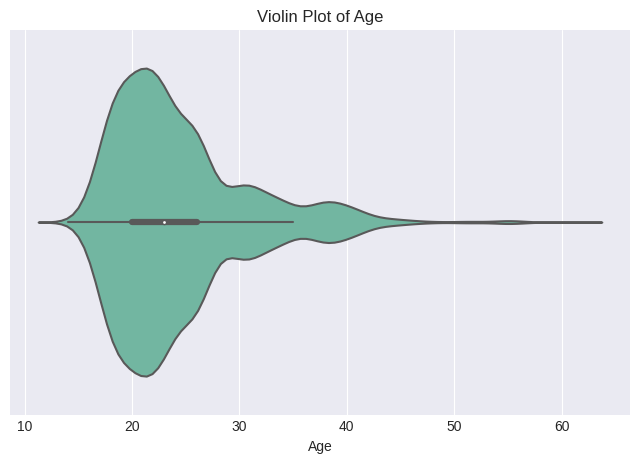

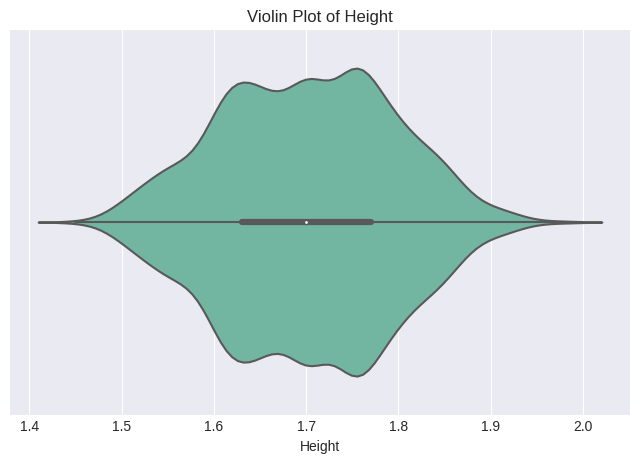

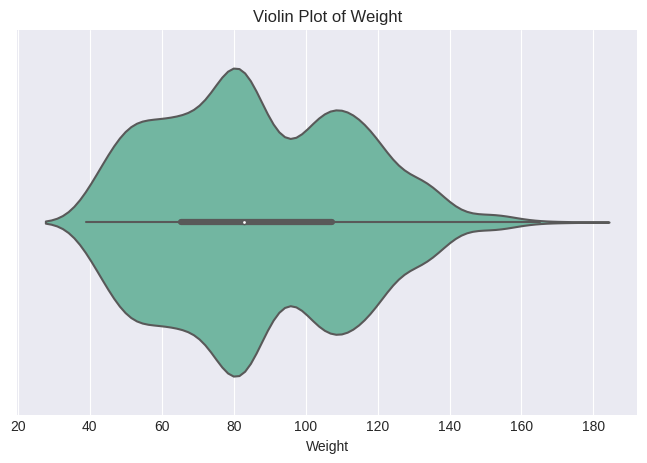

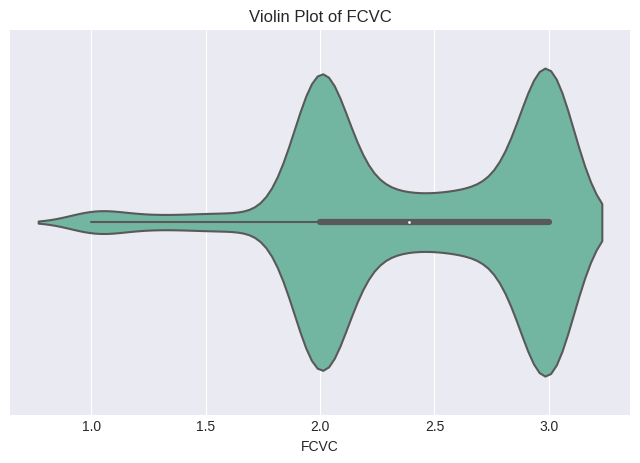

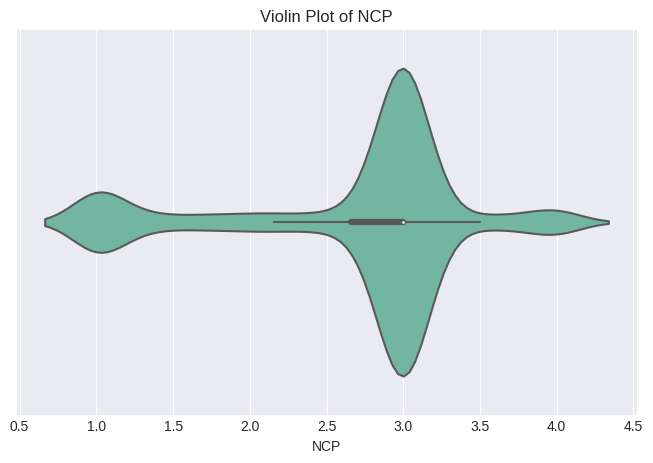

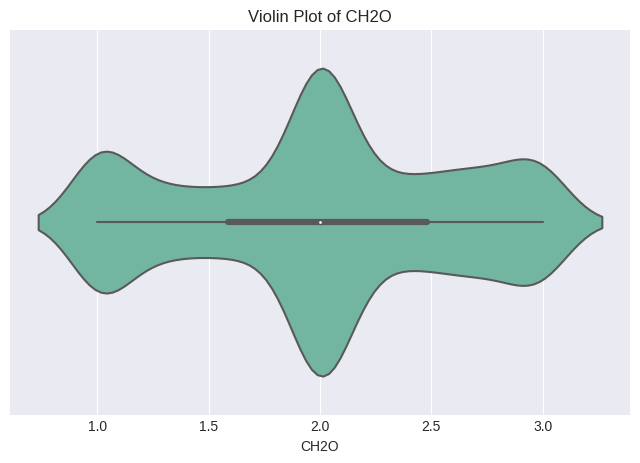

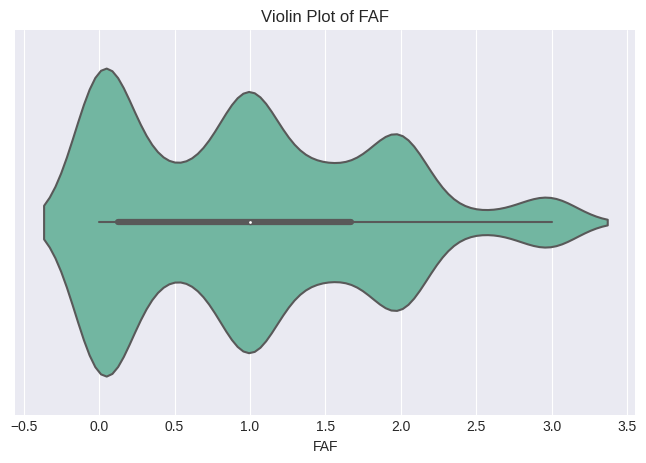

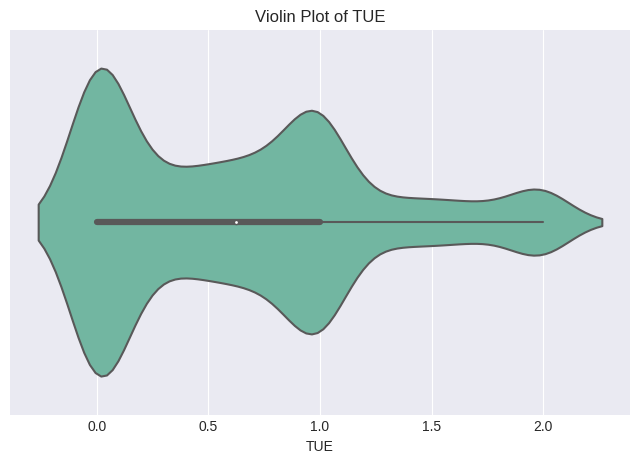

In [17]:
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.violinplot(data=df, x=col, palette='Set2')
    plt.title(f'Violin Plot of {col}')
    plt.show()


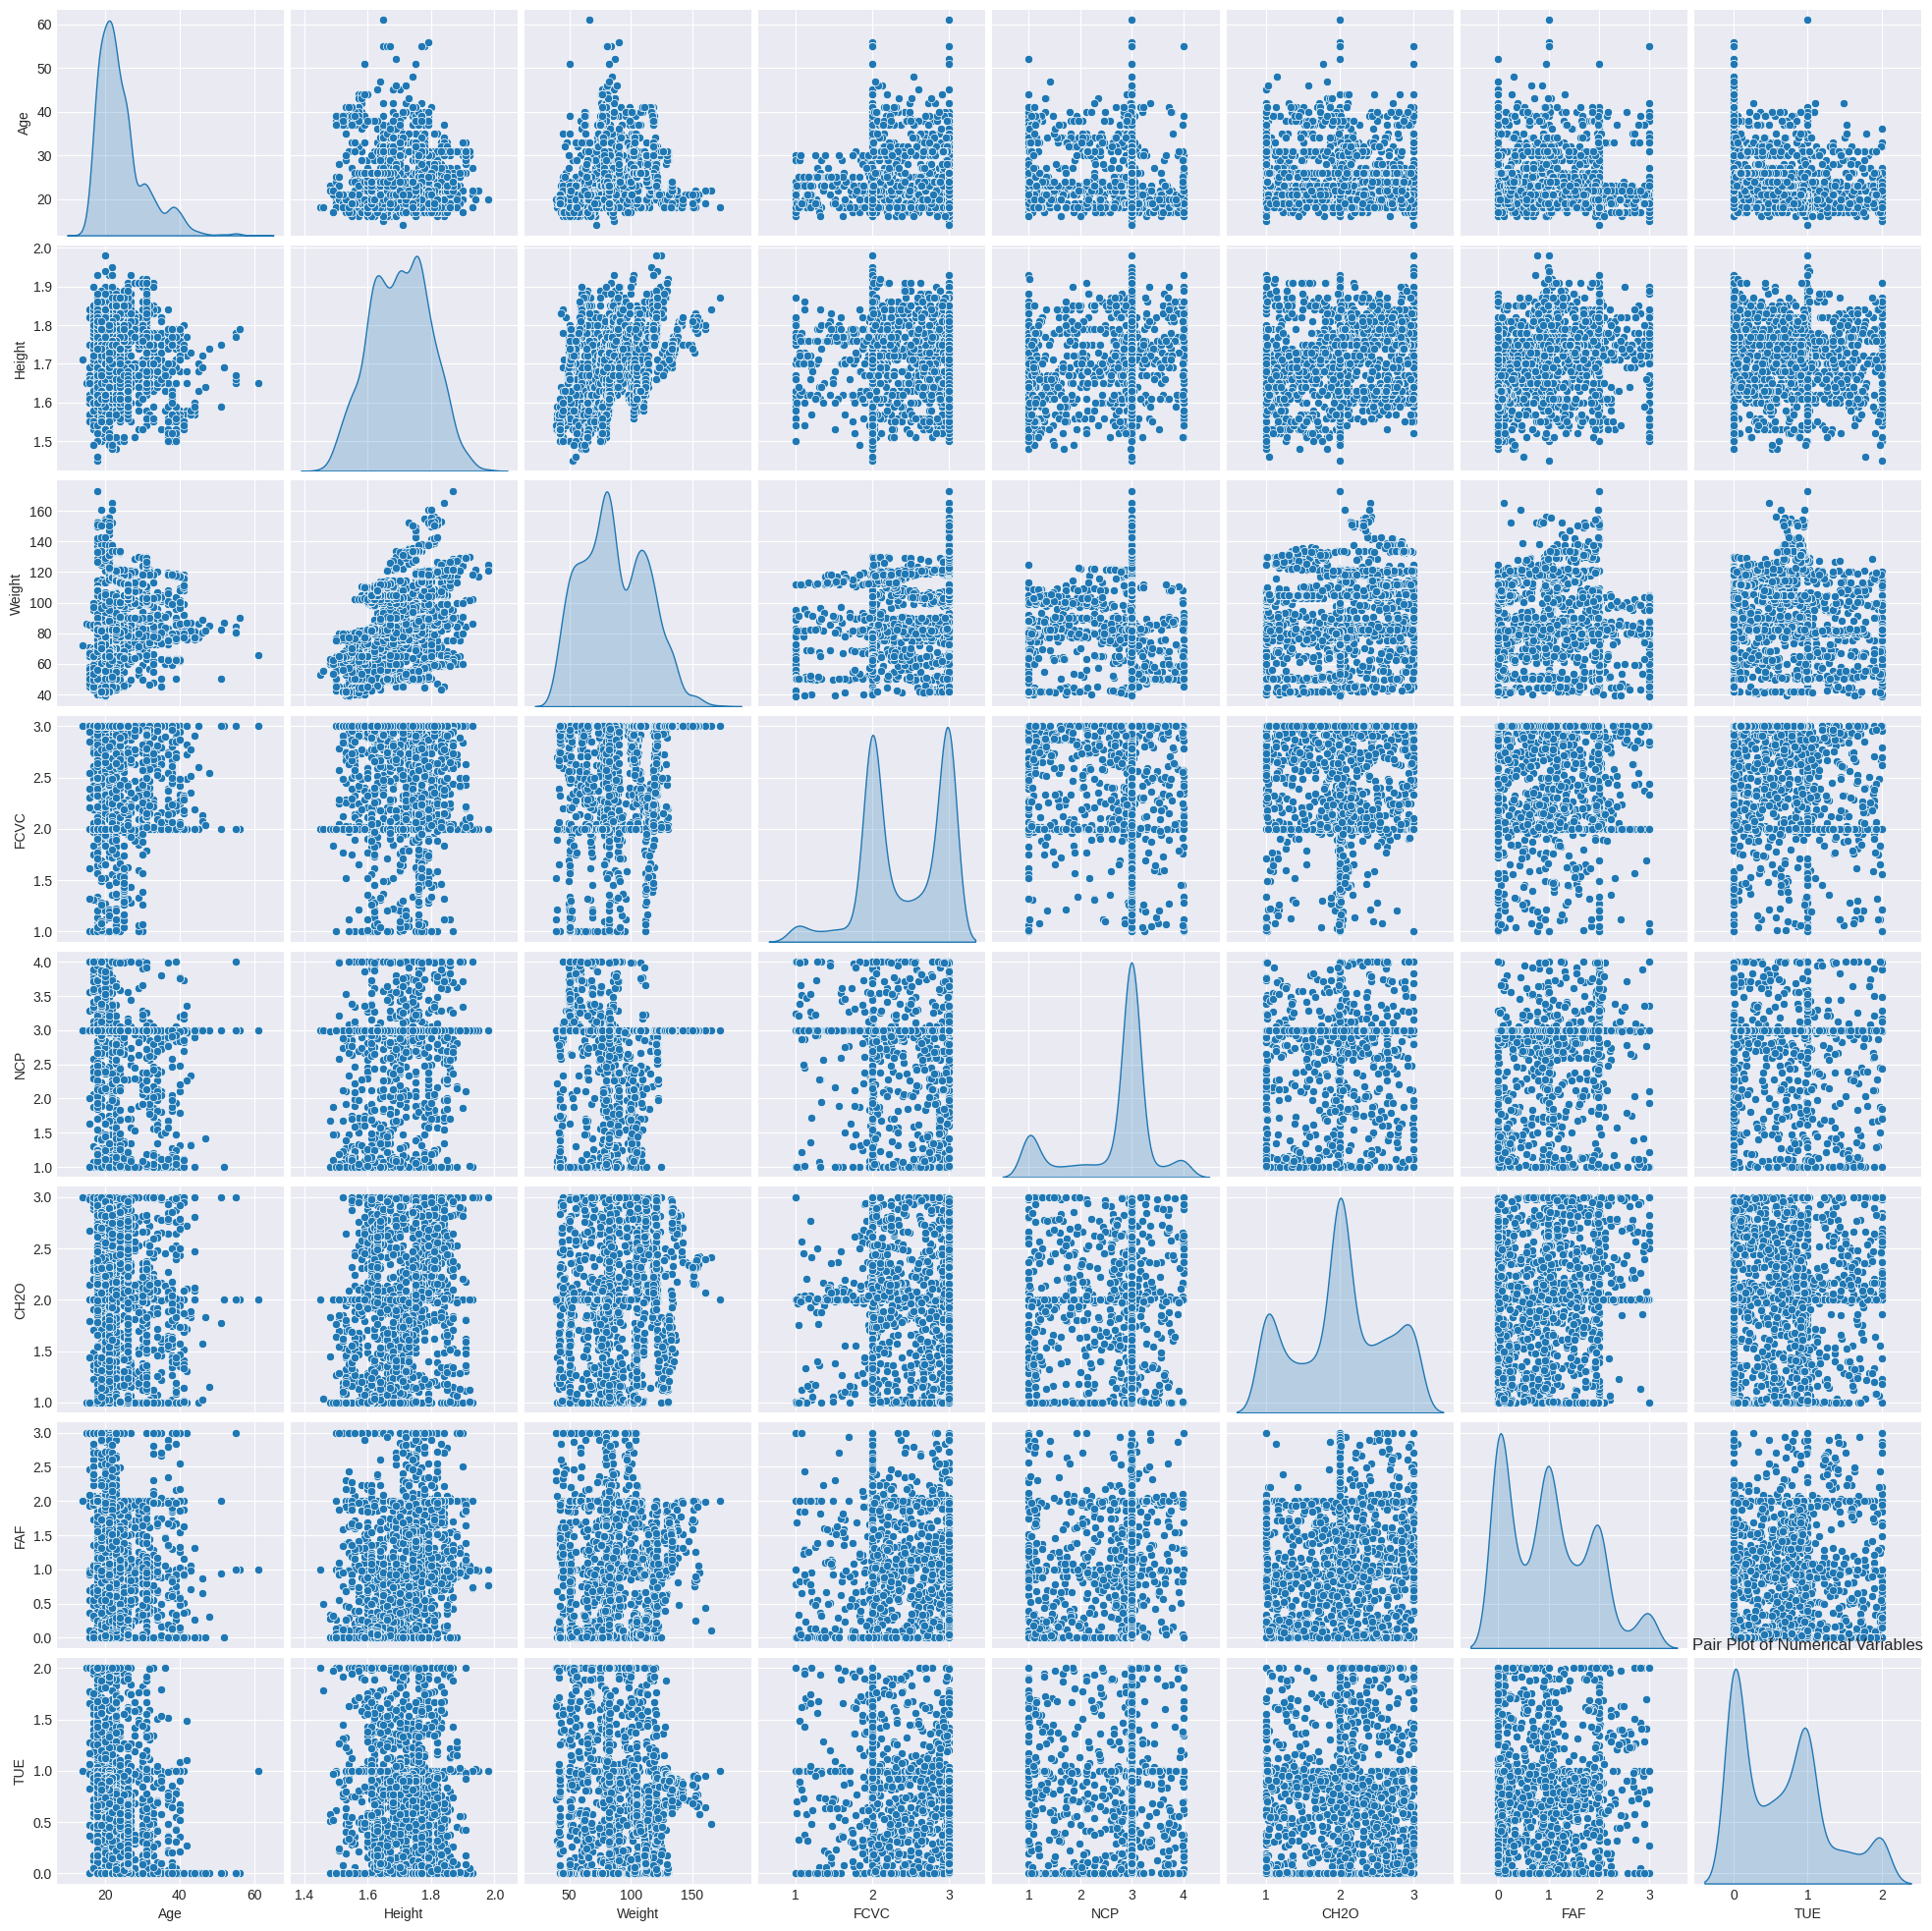

In [18]:
sns.pairplot(df[numerical_cols], diag_kind='kde', palette='husl')
plt.title('Pair Plot of Numerical Variables')
plt.show()


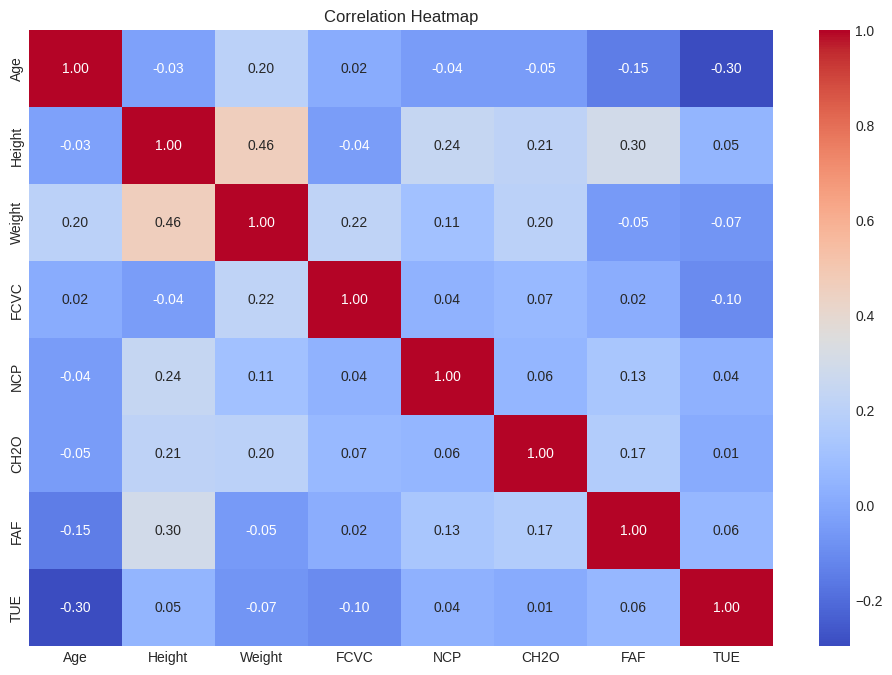

In [19]:
plt.figure(figsize=(12, 8))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


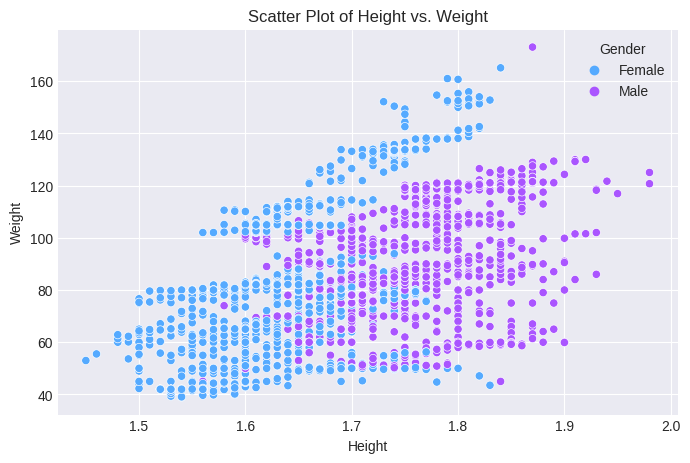

In [20]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Height', y='Weight', hue='Gender', palette='cool')
plt.title('Scatter Plot of Height vs. Weight')
plt.show()


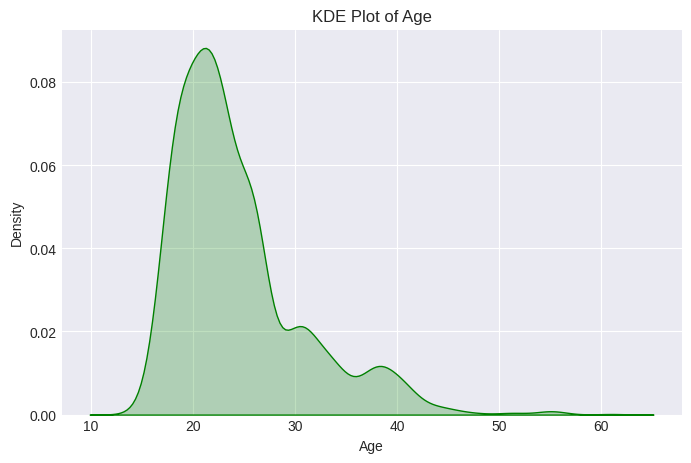

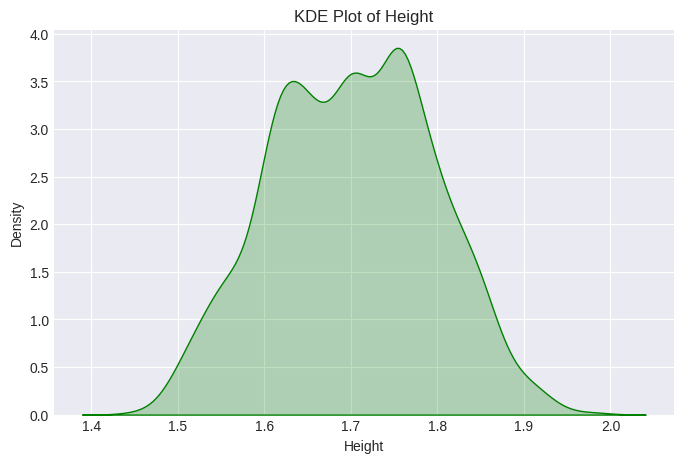

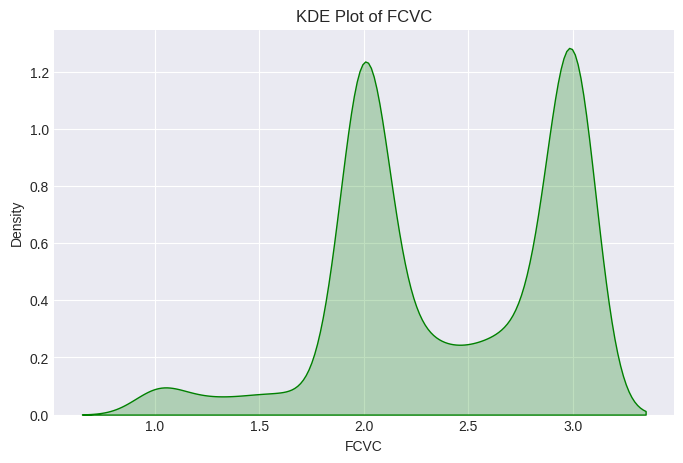

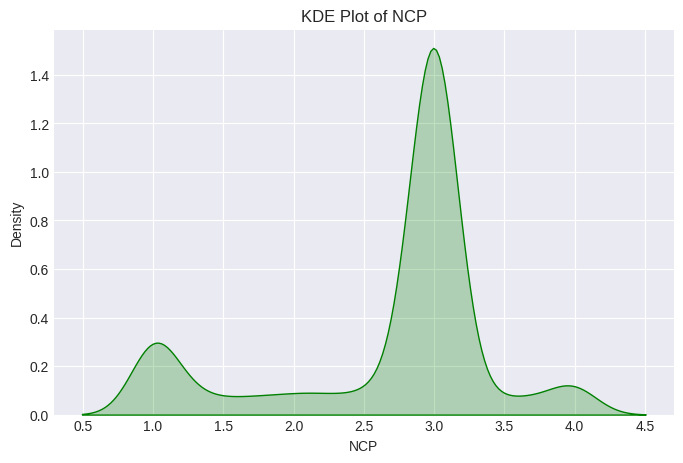

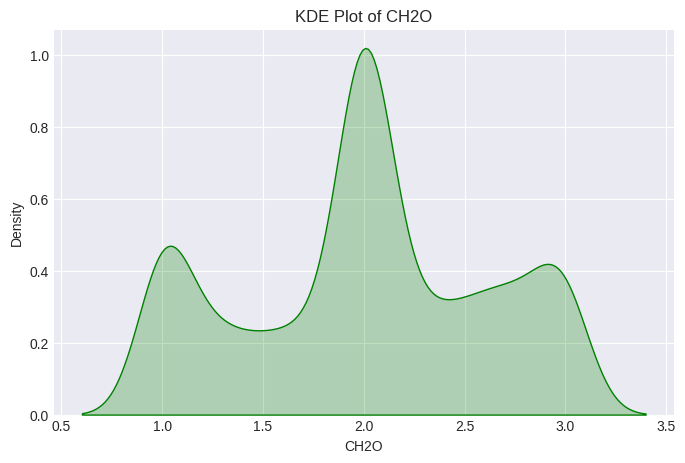

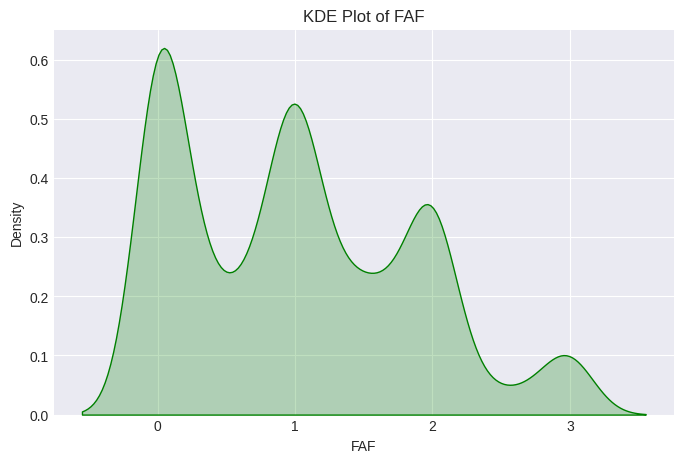

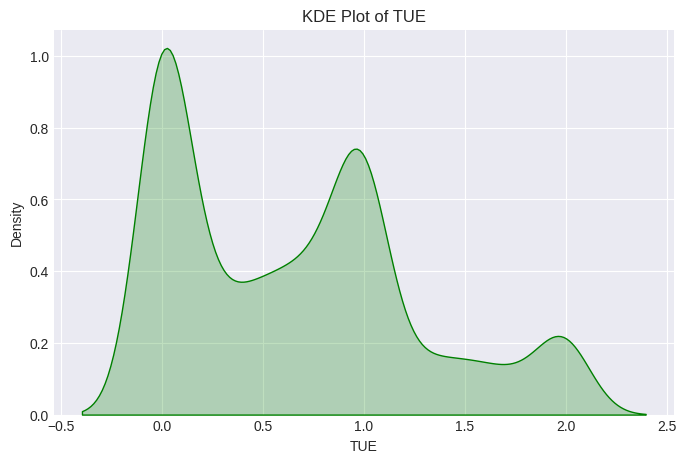

In [21]:
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=df, x=col, shade=True, color='green')
    plt.title(f'KDE Plot of {col}')
    plt.show()


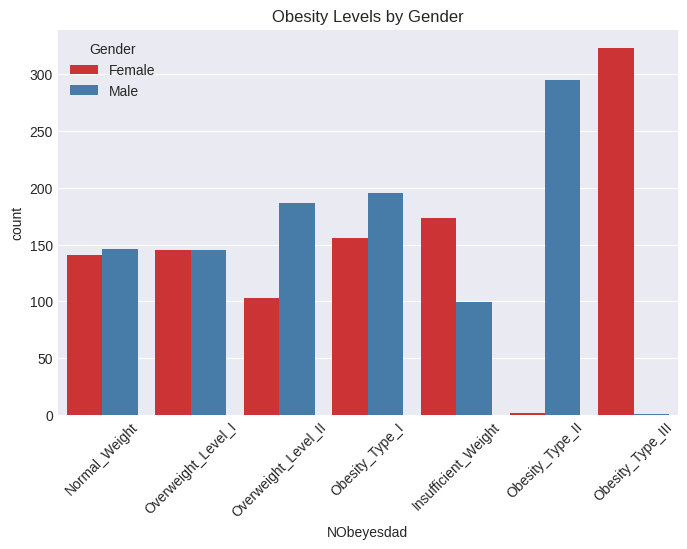

In [22]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='NObeyesdad', hue='Gender', palette='Set1')
plt.title('Obesity Levels by Gender')
plt.xticks(rotation=45)
plt.show()


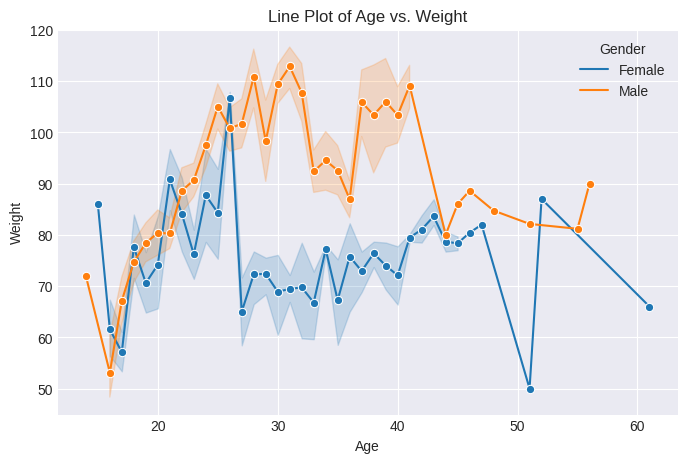

In [23]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x='Age', y='Weight', hue='Gender', marker='o')
plt.title('Line Plot of Age vs. Weight')
plt.show()


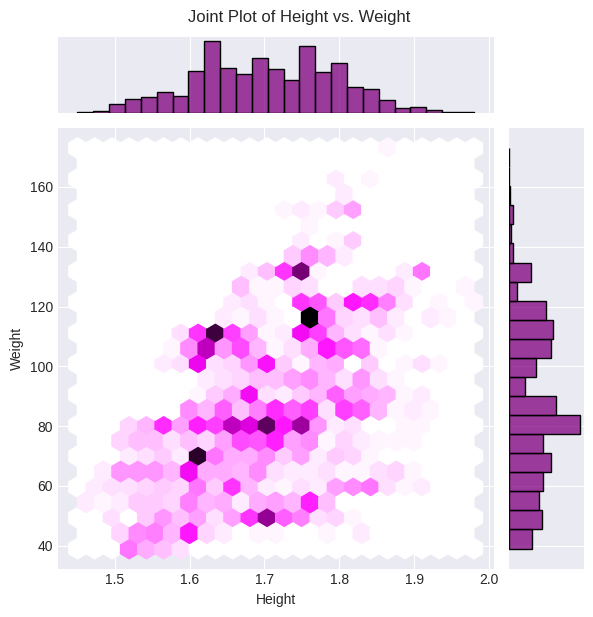

In [24]:
sns.jointplot(data=df, x='Height', y='Weight', kind='hex', color='purple')
plt.suptitle('Joint Plot of Height vs. Weight', y=1.02)
plt.show()


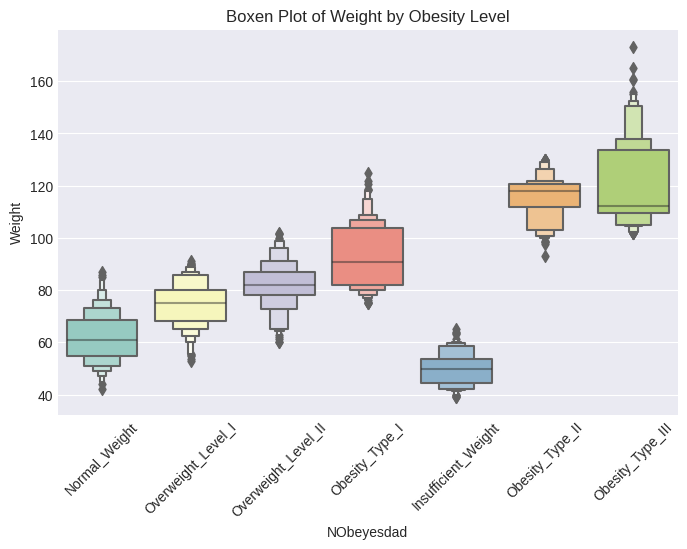

In [25]:
plt.figure(figsize=(8, 5))
sns.boxenplot(data=df, x='NObeyesdad', y='Weight', palette='Set3')
plt.title('Boxen Plot of Weight by Obesity Level')
plt.xticks(rotation=45)
plt.show()


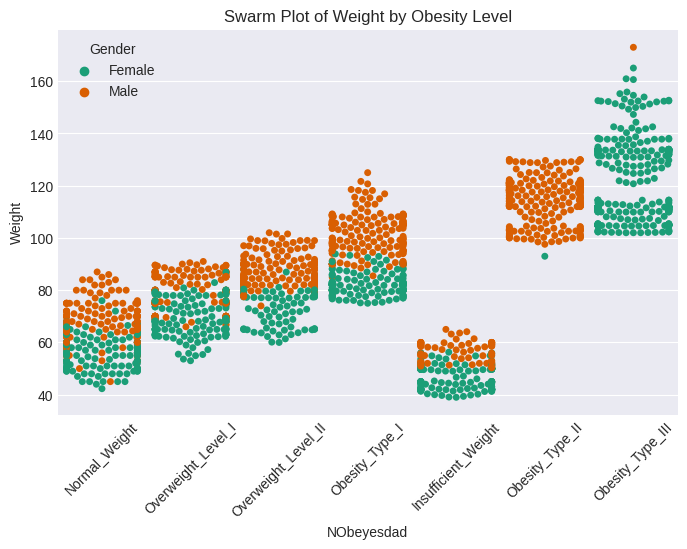

In [26]:
plt.figure(figsize=(8, 5))
sns.swarmplot(data=df, x='NObeyesdad', y='Weight', hue='Gender', palette='Dark2')
plt.title('Swarm Plot of Weight by Obesity Level')
plt.xticks(rotation=45)
plt.show()


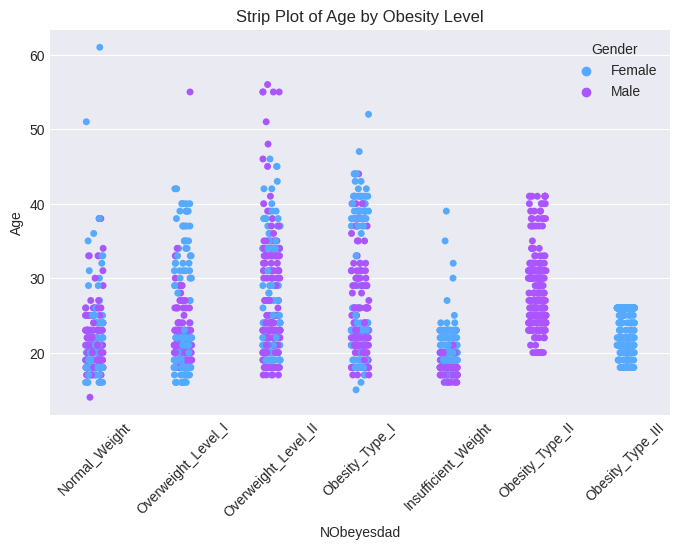

In [27]:
plt.figure(figsize=(8, 5))
sns.stripplot(data=df, x='NObeyesdad', y='Age', jitter=True, hue='Gender', palette='cool')
plt.title('Strip Plot of Age by Obesity Level')
plt.xticks(rotation=45)
plt.show()


<div style="text-align: center; color: #4CAF50; margin: 20px; padding: 15px; font-size: 24px; font-weight: bold;">
    Feature engineernig
</div>


In [28]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of the dataset to avoid modifying the original


# Identify categorical columns
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 
                    'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode each categorical column
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Display the encoded dataframe
print(df.head())


   Gender  Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0   21    1.62    64.0                               1     0   2.0   
1       0   21    1.52    56.0                               1     0   3.0   
2       1   23    1.80    77.0                               1     0   2.0   
3       1   27    1.80    87.0                               0     0   3.0   
4       1   22    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
0  3.0     2      0   2.0    0  0.0  1.0     3       3           1  
1  3.0     2      1   3.0    1  3.0  0.0     2       3           1  
2  3.0     2      0   2.0    0  2.0  1.0     1       3           1  
3  3.0     2      0   2.0    0  2.0  0.0     1       4           5  
4  1.0     2      0   2.0    0  0.0  0.0     2       3           6  


<div style="text-align: center; color: #4CAF50; margin: 20px; padding: 15px; font-size: 24px; font-weight: bold;">
   Data Preprocessing
</div>


In [32]:
# Splitting the data into features and target
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


<div style="text-align: center; color: #4CAF50; margin: 20px; padding: 15px; font-size: 24px; font-weight: bold;">
    Model Training and Evaluation Functions
</div>


In [33]:
def train_and_evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

    # ROC Curve and AUC
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.title(f"{model_name} ROC Curve")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend(loc="lower right")
        plt.show()

    return accuracy


<div style="text-align: center; color: #4CAF50; margin: 20px; padding: 15px; font-size: 24px; font-weight: bold;">
    Model Training and Comparison
</div>


In [34]:
model_accuracies = {}


<div style="text-align: center; color: #4CAF50; margin: 20px; padding: 15px; font-size: 24px; font-weight: bold;">
   List of Models to Train
</div>


Logistic Regression Accuracy: 0.8747
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        56
           1       0.91      0.63      0.74        62
           2       0.95      0.90      0.92        78
           3       0.89      0.97      0.93        58
           4       1.00      1.00      1.00        63
           5       0.77      0.77      0.77        56
           6       0.75      0.86      0.80        50

    accuracy                           0.87       423
   macro avg       0.87      0.87      0.87       423
weighted avg       0.88      0.87      0.87       423



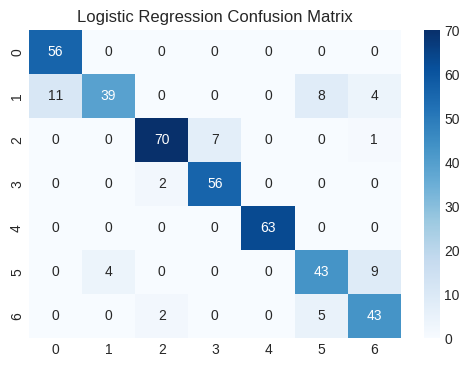

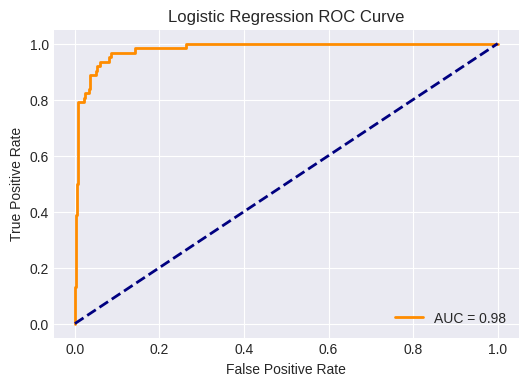

K-Nearest Neighbors Accuracy: 0.8203
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.91      0.80        56
           1       0.67      0.45      0.54        62
           2       0.84      0.92      0.88        78
           3       0.92      0.97      0.94        58
           4       0.98      1.00      0.99        63
           5       0.84      0.68      0.75        56
           6       0.74      0.78      0.76        50

    accuracy                           0.82       423
   macro avg       0.81      0.82      0.81       423
weighted avg       0.82      0.82      0.81       423



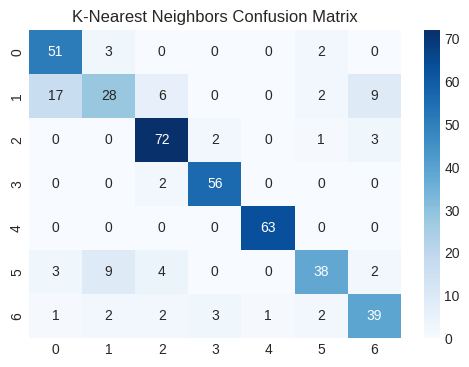

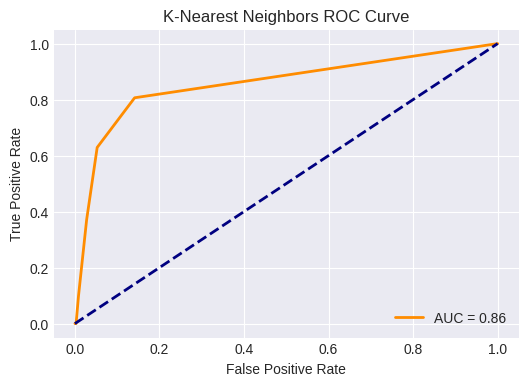

Decision Tree Accuracy: 0.9291
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        56
           1       0.83      0.84      0.83        62
           2       0.97      0.94      0.95        78
           3       0.93      0.95      0.94        58
           4       1.00      1.00      1.00        63
           5       0.87      0.84      0.85        56
           6       0.98      0.98      0.98        50

    accuracy                           0.93       423
   macro avg       0.93      0.93      0.93       423
weighted avg       0.93      0.93      0.93       423



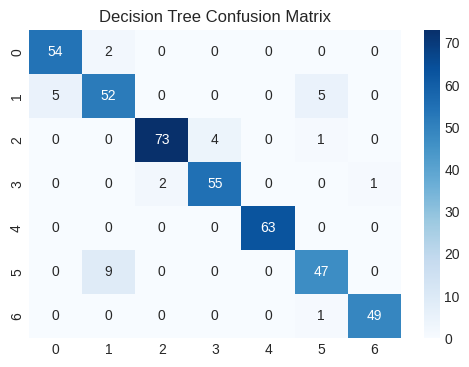

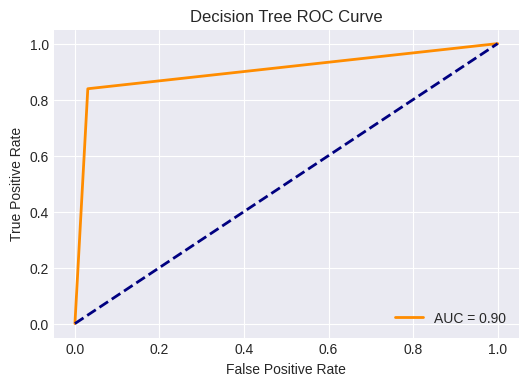

Random Forest Accuracy: 0.9598
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        56
           1       0.89      0.92      0.90        62
           2       0.99      0.97      0.98        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.94      0.89      0.92        56
           6       0.96      0.98      0.97        50

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423



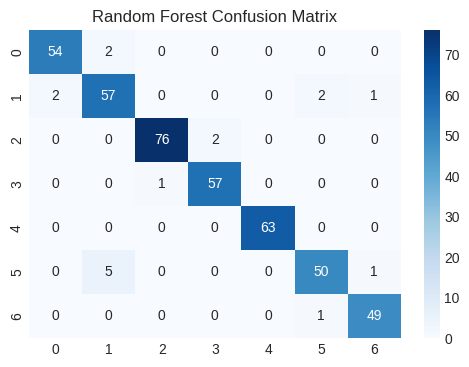

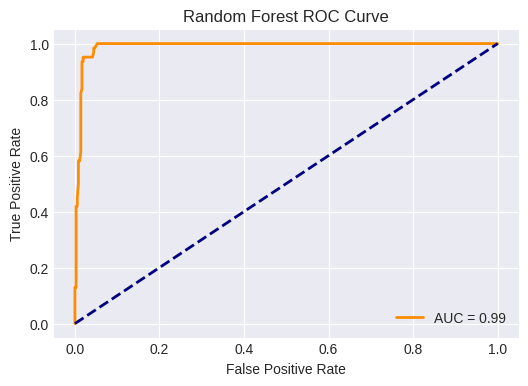

Gradient Boosting Accuracy: 0.9433
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        56
           1       0.93      0.85      0.89        62
           2       0.96      0.92      0.94        78
           3       0.93      0.98      0.96        58
           4       1.00      1.00      1.00        63
           5       0.87      0.93      0.90        56
           6       0.98      0.94      0.96        50

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.94      0.94      0.94       423



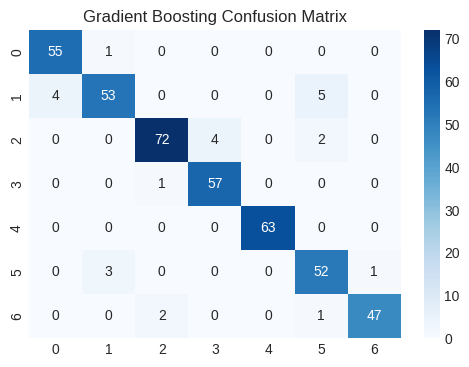

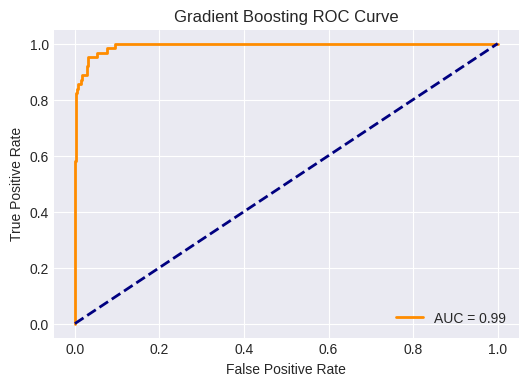

AdaBoost Accuracy: 0.2955
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.05      0.10        56
           1       0.35      0.60      0.44        62
           2       0.25      0.50      0.34        78
           3       0.00      0.00      0.00        58
           4       0.00      0.00      0.00        63
           5       0.29      0.75      0.42        56
           6       0.25      0.08      0.12        50

    accuracy                           0.30       423
   macro avg       0.31      0.28      0.20       423
weighted avg       0.30      0.30      0.21       423



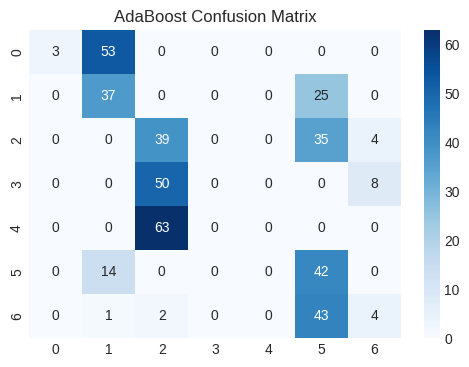

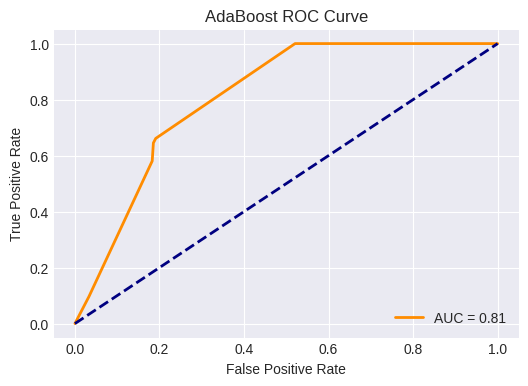

Naive Bayes Accuracy: 0.6407
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.91      0.79        56
           1       0.68      0.34      0.45        62
           2       0.44      0.64      0.52        78
           3       0.66      0.91      0.77        58
           4       1.00      1.00      1.00        63
           5       0.49      0.30      0.37        56
           6       0.57      0.32      0.41        50

    accuracy                           0.64       423
   macro avg       0.65      0.63      0.62       423
weighted avg       0.64      0.64      0.62       423



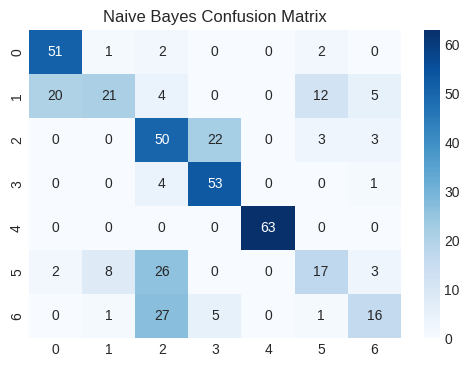

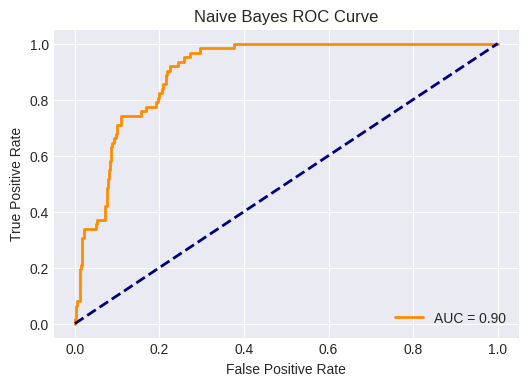

Support Vector Classifier Accuracy: 0.8913
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        56
           1       0.75      0.84      0.79        62
           2       0.95      0.90      0.92        78
           3       0.93      0.98      0.96        58
           4       1.00      1.00      1.00        63
           5       0.79      0.73      0.76        56
           6       0.87      0.82      0.85        50

    accuracy                           0.89       423
   macro avg       0.89      0.89      0.89       423
weighted avg       0.89      0.89      0.89       423



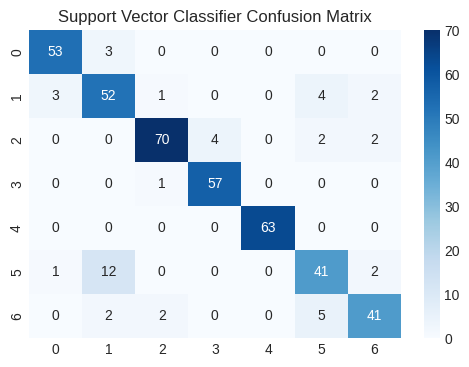

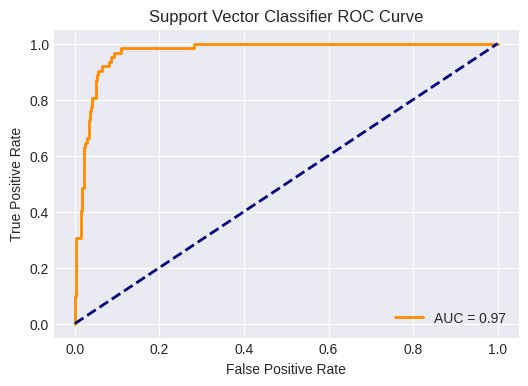

MLP Classifier Accuracy: 0.9149
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        56
           1       0.84      0.84      0.84        62
           2       0.95      0.95      0.95        78
           3       0.95      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.87      0.80      0.83        56
           6       0.84      0.86      0.85        50

    accuracy                           0.91       423
   macro avg       0.91      0.91      0.91       423
weighted avg       0.91      0.91      0.91       423



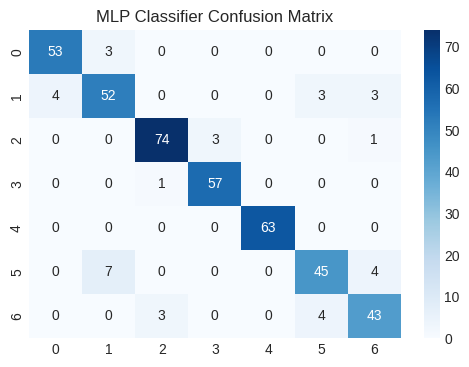

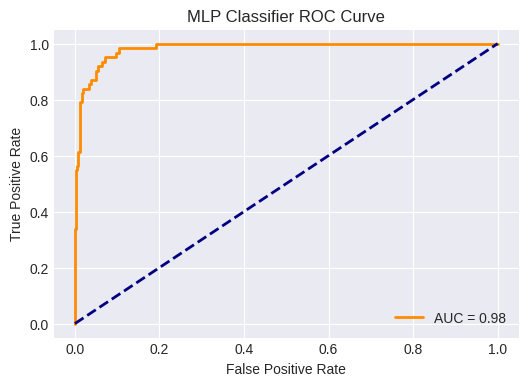

XGBoost Accuracy: 0.9574
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        56
           1       0.95      0.85      0.90        62
           2       0.97      0.97      0.97        78
           3       0.98      0.97      0.97        58
           4       1.00      1.00      1.00        63
           5       0.88      0.93      0.90        56
           6       0.98      0.98      0.98        50

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423



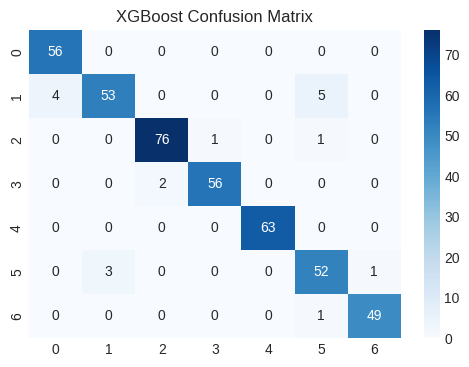

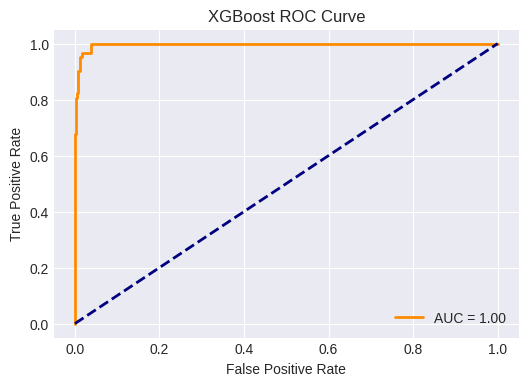

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1241
[LightGBM] [Info] Number of data points in the train set: 1688, number of used features: 16
[LightGBM] [Info] Start training from score -2.056021
[LightGBM] [Info] Start training from score -2.015199
[LightGBM] [Info] Start training from score -1.821828
[LightGBM] [Info] Start training from score -1.954836
[LightGBM] [Info] Start training from score -1.866779
[LightGBM] [Info] Start training from score -1.975979
[LightGBM] [Info] Start training from score -1.950661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

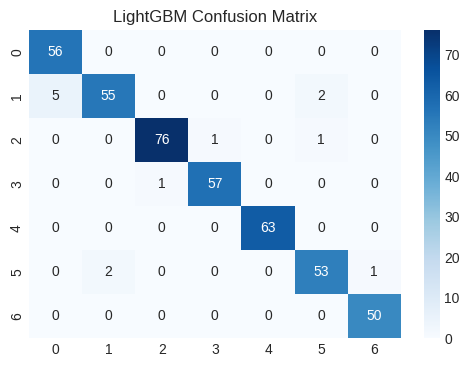

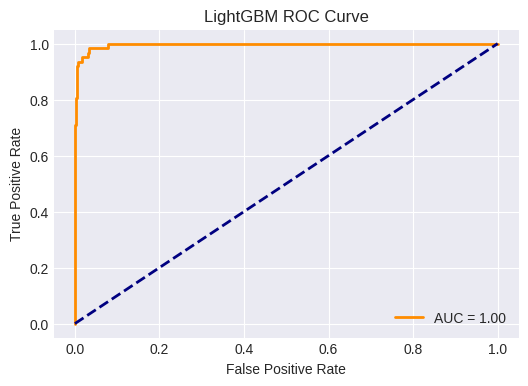

In [35]:
models = [
    (LogisticRegression(), "Logistic Regression"),
    (KNeighborsClassifier(), "K-Nearest Neighbors"),
    (DecisionTreeClassifier(), "Decision Tree"),
    (RandomForestClassifier(), "Random Forest"),
    (GradientBoostingClassifier(), "Gradient Boosting"),
    (AdaBoostClassifier(), "AdaBoost"),
    (GaussianNB(), "Naive Bayes"),
    (SVC(probability=True), "Support Vector Classifier"),
    (MLPClassifier(), "MLP Classifier"),
    (XGBClassifier(), "XGBoost"),
    (LGBMClassifier(), "LightGBM")
]

# Train and evaluate each model
for model, name in models:
    accuracy = train_and_evaluate_model(model, name)
    model_accuracies[name] = accuracy


<div style="text-align: center; color: #4CAF50; margin: 20px; padding: 15px; font-size: 24px; font-weight: bold;">
   Compare Model Performance
</div>


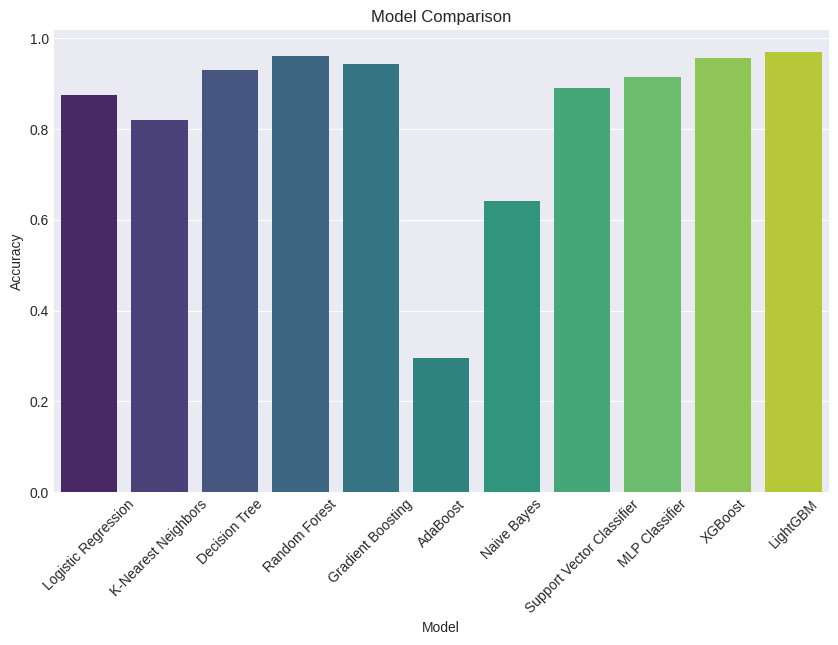

In [36]:
plt.figure(figsize=(10, 6))
model_names = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title("Model Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()


<div style="text-align: center; color: #4CAF50; margin: 20px; padding: 15px; font-size: 24px; font-weight: bold;">
    Feature Importance for Tree-Based Models
</div>


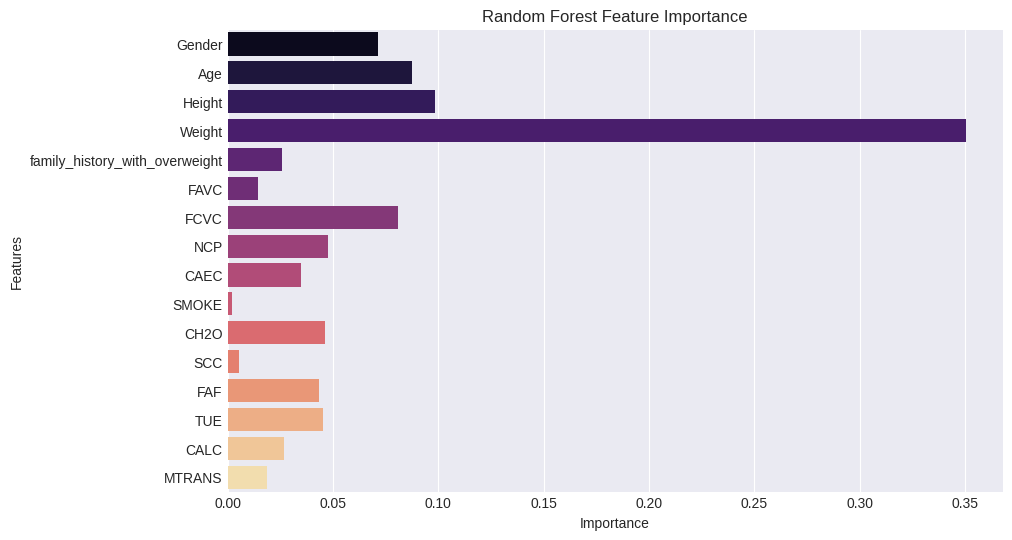

In [37]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
importances = rf.feature_importances_
feature_names = X.columns

# Plotting Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, palette='magma')
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()




---

# 🚀 **Advanced Machine Learning & Deep Learning Notebooks** | 🔥 **Must-See Insights!**  

Hey Kaggle community! 👋 I'm **Arif Mia**, a **Machine Learning Engineer & Data Scientist**, passionate about building impactful ML/DL models and sharing knowledge with the world. 🌍✨  

## 🏆 **What You’ll Find in My Notebooks?**  
📌 **Deep Learning Projects** – CNN, ANN, RNN, and more!  
📌 **Machine Learning Models** – XGBoost, RandomForest, CatBoost, SVM, and top-class models!  
📌 **Exploratory Data Analysis (EDA)** – Stunning visualizations & feature engineering!  
📌 **Real-World Datasets** – Agriculture, healthcare, finance, and more!  
📌 **End-to-End Solutions** – From preprocessing to deployment-ready models!  

## 🔥 **Some of My Top Notebooks:**  
🔹 **Twitter Emotion Classification** - NLP + Hybrid ML Model 📊  
🔹 **Lung Cancer Detection** - CNN with 99% accuracy 🏥  
🔹 **Ghana Crop Disease Detection** - AI for Smart Agriculture 🌾  
🔹 **Bird Classification using CNN & ANN** - Image classification made easy 🐦  

💡 **I also share practical insights on Kaggle competitions & industry use cases!**  

### 💙 **Support My Work!**  
✅ **Upvote** 👍 if you like my work!  
✅ **Comment & Collaborate** 💬 – Let’s grow together!  
✅ **Follow me on Kaggle** for more awesome notebooks!  

📌 **Let’s push the boundaries of AI & Data Science!** 🚀🔬  


